#**PANDAS**

In [10]:
import pandas as pd
import numpy as np

data = {
    "Energy Source": ["Solar", "Wind", "Hydropower", "Geothermal", "Biomass", "Nuclear"],
    "Energy Consumption (MWh)": [1200, np.nan, 2900, np.nan, 2500, 3200],
    "Cost (Million $)": [200, 400, np.nan, 150, 250, np.nan]
}
energy_df = pd.DataFrame(data)

print("Original Energy Data with Missing Values:")
print(energy_df)
print(type(data))

Original Energy Data with Missing Values:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                    1200.0             200.0
1          Wind                       NaN             400.0
2    Hydropower                    2900.0               NaN
3    Geothermal                       NaN             150.0
4       Biomass                    2500.0             250.0
5       Nuclear                    3200.0               NaN
<class 'dict'>


1.Handling missing values

In [11]:
real_df=energy_df.isnull().sum()
print(real_df)
cleaned_df=energy_df.dropna()
print("\nDataFrame after handling missing values:")
print(cleaned_df)

Energy Source               0
Energy Consumption (MWh)    2
Cost (Million $)            2
dtype: int64

DataFrame after handling missing values:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                    1200.0             200.0
4       Biomass                    2500.0             250.0


1.1 impute missing values with mean

In [12]:
energy_df.iloc[:,1]=energy_df["Energy Consumption (MWh)"].fillna(energy_df["Energy Consumption (MWh)"].mean())
energy_df.iloc[:,2]=energy_df["Cost (Million $)"].fillna(energy_df["Cost (Million $)"].mean())
print("\nDataFrame after imputing missing values:")
print(energy_df)


DataFrame after imputing missing values:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                    1200.0             200.0
1          Wind                    2450.0             400.0
2    Hydropower                    2900.0             250.0
3    Geothermal                    2450.0             150.0
4       Biomass                    2500.0             250.0
5       Nuclear                    3200.0             250.0


1.2 Forward Filling method

In [13]:
forward_filled_df = energy_df.ffill()
print("\nDataFrame before forward filling missing values:")
print(energy_df)
print("\nDataFrame after forward filling missing values:")
print(forward_filled_df)


DataFrame before forward filling missing values:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                    1200.0             200.0
1          Wind                    2450.0             400.0
2    Hydropower                    2900.0             250.0
3    Geothermal                    2450.0             150.0
4       Biomass                    2500.0             250.0
5       Nuclear                    3200.0             250.0

DataFrame after forward filling missing values:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                    1200.0             200.0
1          Wind                    2450.0             400.0
2    Hydropower                    2900.0             250.0
3    Geothermal                    2450.0             150.0
4       Biomass                    2500.0             250.0
5       Nuclear                    3200.0             250.0


2.**SCALING**

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
energy_df[["Energy Consumption (MWh)","Cost (Million $)"]]=scaler.fit_transform(energy_df[["Energy Consumption (MWh)","Cost (Million $)"]])
print("\nDataFrame after scaling:")
print(energy_df)


DataFrame after scaling:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                     0.000               0.2
1          Wind                     0.625               1.0
2    Hydropower                     0.850               0.4
3    Geothermal                     0.625               0.0
4       Biomass                     0.650               0.4
5       Nuclear                     1.000               0.4


**2.1 Standard Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
energy_df[["Energy Consumption (MWh)","Cost (Million $)"]]=scaler.fit_transform(energy_df[["Energy Consumption (MWh)","Cost (Million $)"]])
print("\nDataFrame after scaling:")
print(energy_df)


DataFrame after scaling:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar             -2.005893e+00     -6.546537e-01
1          Wind              3.563181e-16      1.963961e+00
2    Hydropower              7.221213e-01      1.817029e-16
3    Geothermal              3.563181e-16     -1.309307e+00
4       Biomass              8.023570e-02      1.817029e-16
5       Nuclear              1.203536e+00      1.817029e-16


**2.2 Energy Encoding**

In [16]:
energy_encoded = pd.get_dummies(energy_df, columns=["Energy Source"],dtype=int)
print("\nDataFrame after encoding:")
print(energy_encoded)


DataFrame after encoding:
   Energy Consumption (MWh)  Cost (Million $)  Energy Source_Biomass  \
0             -2.005893e+00     -6.546537e-01                      0   
1              3.563181e-16      1.963961e+00                      0   
2              7.221213e-01      1.817029e-16                      0   
3              3.563181e-16     -1.309307e+00                      0   
4              8.023570e-02      1.817029e-16                      1   
5              1.203536e+00      1.817029e-16                      0   

   Energy Source_Geothermal  Energy Source_Hydropower  Energy Source_Nuclear  \
0                         0                         0                      0   
1                         0                         0                      0   
2                         0                         1                      0   
3                         1                         0                      0   
4                         0                         0               

In [17]:
from sklearn.preprocessing import LabelEncoder
energy_df1=energy_df.copy()
print(energy_df)
label_encoder = LabelEncoder()
energy_df1["Energy Source"] = label_encoder.fit_transform(energy_df1["Energy Source"])
print("\nDataFrame after encoding:")
print(energy_df1)

  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar             -2.005893e+00     -6.546537e-01
1          Wind              3.563181e-16      1.963961e+00
2    Hydropower              7.221213e-01      1.817029e-16
3    Geothermal              3.563181e-16     -1.309307e+00
4       Biomass              8.023570e-02      1.817029e-16
5       Nuclear              1.203536e+00      1.817029e-16

DataFrame after encoding:
   Energy Source  Energy Consumption (MWh)  Cost (Million $)
0              4             -2.005893e+00     -6.546537e-01
1              5              3.563181e-16      1.963961e+00
2              2              7.221213e-01      1.817029e-16
3              1              3.563181e-16     -1.309307e+00
4              0              8.023570e-02      1.817029e-16
5              3              1.203536e+00      1.817029e-16


#**MATPLOTLIB**

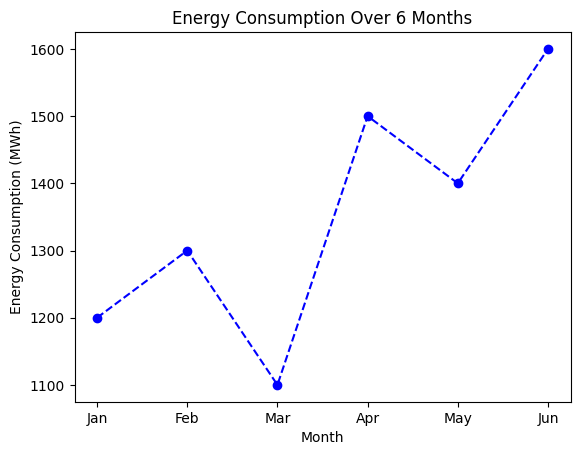

In [25]:
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
energy_consumption = [1200, 1300, 1100, 1500, 1400, 1600]

plt.plot(months, energy_consumption, marker='o', color='b', linestyle='--')

plt.title('Energy Consumption Over 6 Months')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MWh)')
plt.show()

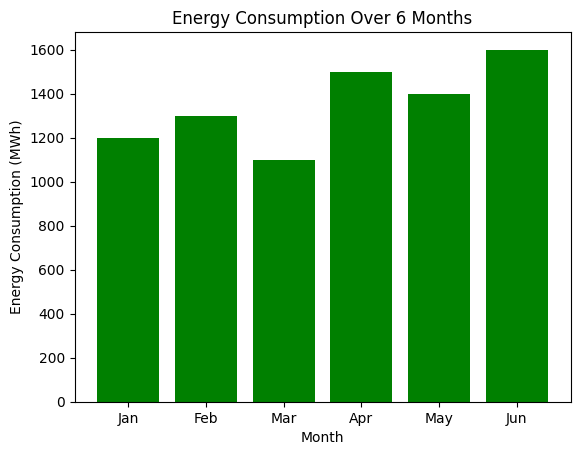

In [26]:
plt.bar(months, energy_consumption, color='g')
plt.title('Energy Consumption Over 6 Months')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MWh)')
plt.show()

#**SEABORN**

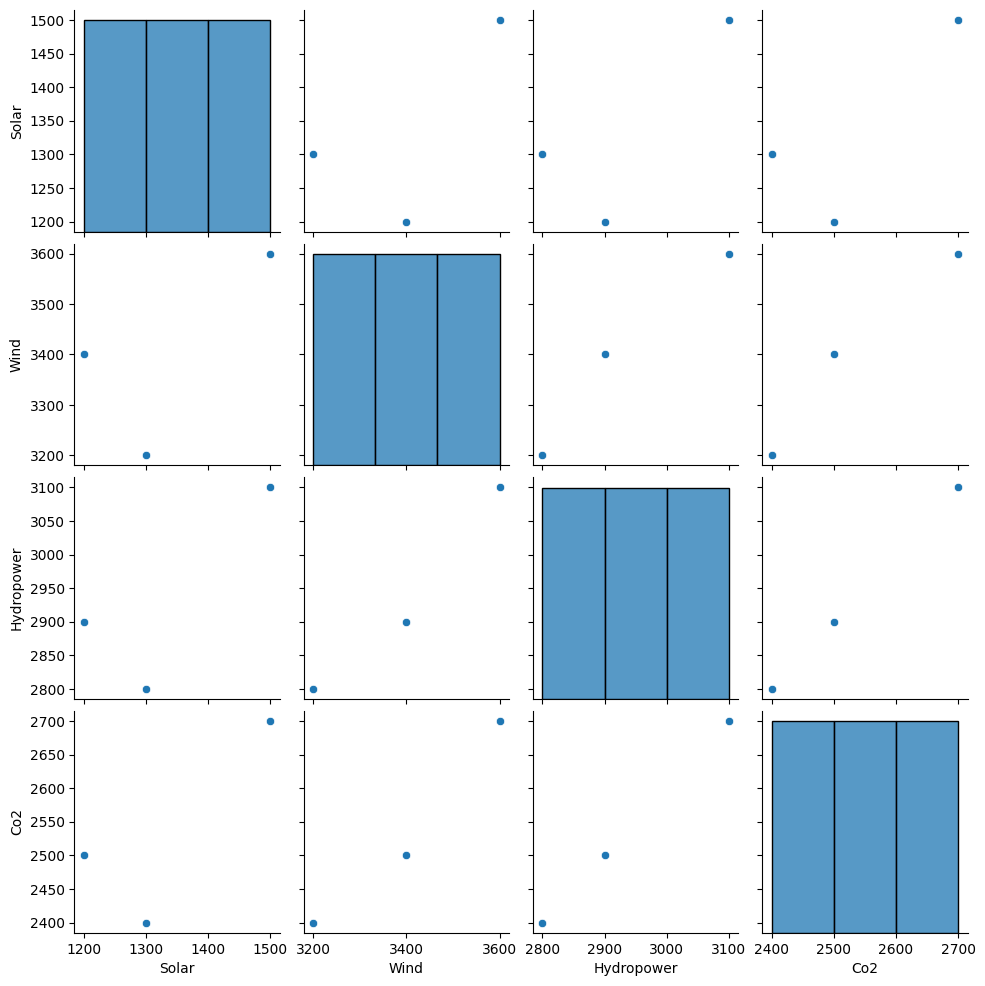

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame for pair plot
data = {
    "Solar": [1200, 1500, 1300],
    "Wind": [3400, 3600, 3200],
    "Hydropower": [2900, 3100, 2800],
    "Co2": [2500, 2700, 2400]
}
df = pd.DataFrame(data)

# Create a pair plot
sns.pairplot(df)
plt.show()

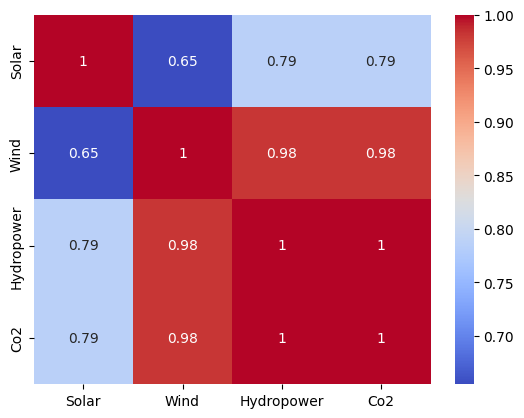

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title='correlation heatmap'
plt.show()

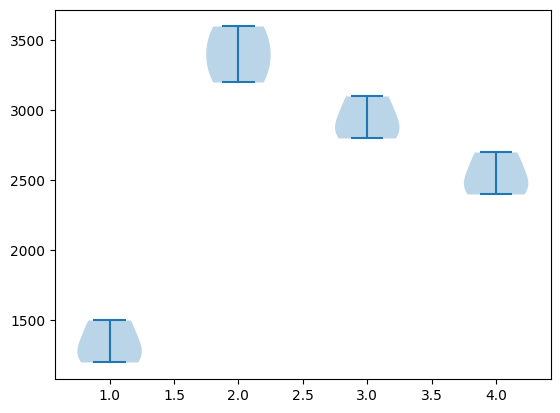

In [33]:
plt.violinplot(df)
plt.xlabel='Energy Source'
plt.ylabel='Energy Consumption (MWh)'
plt.title='violin plot'

plt.show()